In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd

In [2]:
def get_doc_file(dic_path):
  doc_file= open(dic_path, 'r', encoding= 'ISO-8859-1')
  return doc_file.read()

# Description

In [5]:
print(get_doc_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/description.txt'))

Condition monitoring of hydraulic systems

Abtract: The data set addresses the condition assessment of a hydraulic test rig based on multi sensor data. Four fault types are superimposed with several severity grades impeding selective quantification.

Source:
Creator: ZeMA gGmbH, Eschberger Weg 46, 66121 Saarbrücken
Contact: t.schneider@zema.de, s.klein@zema.de, m.bastuck@lmt.uni-saarland.de, info@lmt.uni-saarland.de

Data Type: Multivariate, Time-Series
Task: Classification, Regression
Attribute Type: Categorical, Real
Area: CS/Engineering
Format Type: Matrix
Does your data set contain missing values? No

Number of Instances: 2205

Number of Attributes: 43680 (8x60 (1 Hz) + 2x600 (10 Hz) + 7x6000 (100 Hz))

Relevant Information:
The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank [1], [2]. The system cyclically repeats constant load cycles (duratio

#Documentation

In [6]:
print(get_doc_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/documentation.txt'))

1. Title: Condition monitoring of hydraulic systems

2. Source Information
   -- Creator: Nikolai Helwig, ZeMA gGmbH, Eschberger Weg 46, 66121 Saarbrücken
   -- Donors (with approval from creator): M. Bastuck (m.bastuck@lmt.uni-saarland.de), T. Schneider (t.schneider@zema.de)
   -- Date: April, 2018
 
3. Past Usage:
   [1] Nikolai Helwig, Eliseo Pignanelli, Andreas Schütze, Condition Monitoring of a Complex Hydraulic System Using Multivariate Statistics, in Proc. I2MTC-2015 - 2015 IEEE International Instrumentation and Measurement Technology Conference, paper PPS1-39, Pisa, Italy, May 11-14, 2015. doi: 10.1109/I2MTC.2015.7151267
      -- detailed description of data and measurement setup
      -- automated feature extraction via Pearson correlation and comparison of several classification algorithms
      -- Cooler and Valve states are "easy" targets (perfect classification achieved), Pump and especially Accumulator states are more complex targets

   [2] N. Helwig, A. Schütze, Dete

# IMPORTING AND EDA

EDA


In [7]:
def get_file(dic_path):
  return pd.read_csv(dic_path,sep = '\t',header = None)

In [8]:
FS1= get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/FS1.txt')
PS1 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/PS1.txt')
PS2 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/PS2.txt')
PS3 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/PS3.txt')
PS4 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/PS4.txt')
PS5 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/PS5.txt')
PS6 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/PS6.txt')
EPS1 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/EPS1.txt')
FS2 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/FS2.txt')
TS1 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/TS1.txt')
TS2 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/TS2.txt')
TS3 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/TS3.txt')
TS4 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/TS4.txt')
VS1 = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/VS1.txt')
CE = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/CE.txt')
CP = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/CP.txt')
SE = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/SE.txt')

In [9]:
b = [PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE]
for i in b:
  i['mean'] = i.mean(axis = 1)

In [10]:
col = ['PS1','PS2','PS3','PS4','PS5','PS6','EPS1','FS1','FS2','TS1','TS2','TS3','TS4','VS1','CE','CP','SE']
final_data = pd.DataFrame(columns=col)

In [11]:
for i,j in zip(b,col):
  new = np.round(i['mean'],3)
  final_data[j]= new


In [12]:
profile = get_file('/content/drive/MyDrive/hydrolic project/Abhi. Hydrolic/profile.txt')
profile

,0,1,2,3,4
0,3,100,0,130,1
1,3,100,0,130,1
2,3,100,0,130,1
3,3,100,0,130,1
4,3,100,0,130,1
...,...,...,...,...,...
2200,100,100,0,90,0
2201,100,100,0,90,0
2202,100,100,0,90,0
2203,100,100,0,90,0


## Rename dependent column 

In [13]:
final_data['CC'] = profile[0]
final_data['VC'] = profile[1]
final_data['IPL'] = profile[2]
final_data['HA'] = profile[3]
final_data['SF'] = profile[4]

In [14]:
data= final_data
data

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,CC,VC,IPL,HA,SF
0,160.673,109.467,1.991,0.000,9.842,9.728,2538.929,6.710,10.305,35.622,...,31.745,0.577,39.601,1.863,59.157,3,100,0,130,1
1,160.603,109.355,1.976,0.000,9.635,9.529,2531.499,6.715,10.403,36.677,...,34.494,0.566,25.786,1.256,59.336,3,100,0,130,1
2,160.348,109.159,1.972,0.000,9.531,9.428,2519.928,6.719,10.366,37.881,...,35.646,0.577,22.218,1.113,59.543,3,100,0,130,1
3,160.188,109.065,1.947,0.000,9.439,9.337,2511.542,6.721,10.303,38.879,...,36.579,0.569,20.460,1.062,59.795,3,100,0,130,1
4,160.000,108.931,1.923,0.000,9.359,9.261,2503.450,6.690,10.238,39.804,...,37.428,0.577,19.787,1.070,59.455,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.228,109.780,2.001,10.202,9.972,9.850,2543.911,6.690,10.185,35.314,...,30.405,0.551,46.629,2.161,59.033,100,100,0,90,0
2201,161.206,109.787,1.999,10.198,9.966,9.845,2543.411,6.692,10.178,35.322,...,30.416,0.547,46.690,2.151,59.068,100,100,0,90,0
2202,161.192,109.756,1.993,10.197,9.964,9.843,2542.730,6.693,10.176,35.319,...,30.426,0.545,46.472,2.143,59.132,100,100,0,90,0
2203,161.209,109.794,2.007,10.199,9.968,9.847,2544.046,6.684,10.178,35.325,...,30.414,0.537,46.545,2.148,58.971,100,100,0,90,0


# Export Final Dataset

In [15]:
data.to_csv('HYDROLIC_DS')

#DATA PREPROCESSING FOR TRAINING

In [16]:
data = pd.read_csv('/content/drive/MyDrive/hydrolic project/HYDROLIC_DS').iloc[:,1:]
data

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,CC,VC,IPL,HA,SF
0,160.673,109.467,1.991,0.000,9.842,9.728,2538.929,6.710,10.305,35.622,...,31.745,0.577,39.601,1.863,59.157,3,100,0,130,1
1,160.603,109.355,1.976,0.000,9.635,9.529,2531.499,6.715,10.403,36.677,...,34.494,0.566,25.786,1.256,59.336,3,100,0,130,1
2,160.348,109.159,1.972,0.000,9.531,9.428,2519.928,6.719,10.366,37.881,...,35.646,0.577,22.218,1.113,59.543,3,100,0,130,1
3,160.188,109.065,1.947,0.000,9.439,9.337,2511.542,6.721,10.303,38.879,...,36.579,0.569,20.460,1.062,59.795,3,100,0,130,1
4,160.000,108.931,1.923,0.000,9.359,9.261,2503.450,6.690,10.238,39.804,...,37.428,0.577,19.787,1.070,59.455,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.228,109.780,2.001,10.202,9.972,9.850,2543.911,6.690,10.185,35.314,...,30.405,0.551,46.629,2.161,59.033,100,100,0,90,0
2201,161.206,109.787,1.999,10.198,9.966,9.845,2543.411,6.692,10.178,35.322,...,30.416,0.547,46.690,2.151,59.068,100,100,0,90,0
2202,161.192,109.756,1.993,10.197,9.964,9.843,2542.730,6.693,10.176,35.319,...,30.426,0.545,46.472,2.143,59.132,100,100,0,90,0
2203,161.209,109.794,2.007,10.199,9.968,9.847,2544.046,6.684,10.178,35.325,...,30.414,0.537,46.545,2.148,58.971,100,100,0,90,0


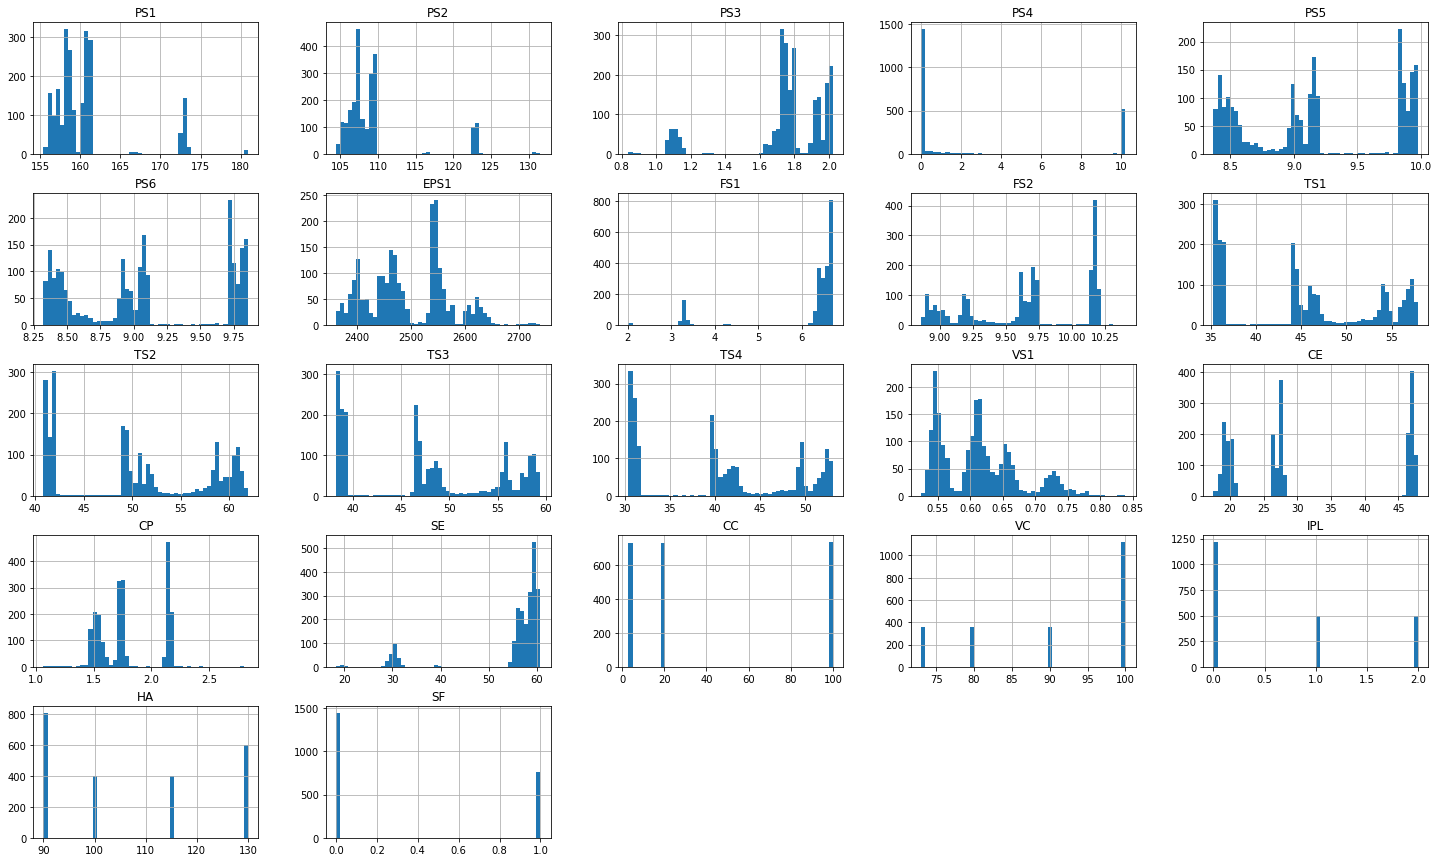

In [17]:
data.hist(bins = 50,figsize = (25,15));

# DEPENDENT VARIABLE CC

In [18]:
X = data.iloc[:,:17].values
y = data.iloc[:,-5].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 10)

### Logistic Regressor

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  #-3 to 3
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([('Scaleing',StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state =0))])

In [ ]:
pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('Scaleing', StandardScaler()),
                ('lr_classifier', LogisticRegression(random_state=0))])

In [ ]:
y_pred = pipeline_lr.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[ 20  20]
 [ 20  20]
 [100 100]
 [100 100]
 [ 20  20]
 [ 20  20]
 [ 20  20]
 [  3   3]
 [ 20  20]
 [ 20  20]
 [  3   3]
 [  3   3]
 [  3   3]
 [  3   3]
 [ 20  20]
 [100 100]
 [ 20  20]
 [  3   3]
 [100 100]
 [100 100]
 [ 20  20]
 [  3   3]
 [  3   3]
 [ 20  20]
 [ 20  20]
 [ 20  20]
 [100 100]
 [100 100]
 [100 100]
 [  3   3]
 [  3   3]
 [ 20  20]
 [ 20  20]
 [  3   3]
 [ 20  20]
 [ 20  20]
 [100 100]
 [ 20  20]
 [100 100]
 [ 20  20]
 [100 100]
 [ 20  20]
 [ 20  20]
 [  3  20]
 [ 20  20]
 [ 20  20]
 [  3   3]
 [100 100]
 [  3   3]
 [  3   3]
 [100 100]
 [  3   3]
 [ 20  20]
 [100 100]
 [ 20  20]
 [100 100]
 [100 100]
 [ 20  20]
 [  3   3]
 [100 100]
 [ 20  20]
 [ 20  20]
 [  3   3]
 [ 20  20]
 [100 100]
 [100 100]
 [100 100]
 [  3   3]
 [ 20  20]
 [ 20  20]
 [ 20  20]
 [100 100]
 [100 100]
 [ 20  20]
 [ 20  20]
 [100 100]
 [100 100]
 [100 100]
 [  3   3]
 [  3   3]
 [  3   3]
 [  3   3]
 [ 20  20]
 [100 100]
 [ 20  20]
 [100 100]
 [  3   3]
 [  3   3]
 [ 20  20]
 [  3   3]
 [100 100]

## Make confusion matrics ,accuracy

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[142   1   0]
 [  1 147   0]
 [  0   0 150]]


99.54648526077098

##Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
def acc_scores(reg,independent,dependent):
  accuracies = cross_val_score(reg, independent, dependent, cv = 10, n_jobs =-1)
  print('scores:',accuracies)
  print('k-fold accuracy:{:.2f}%'.format(accuracies.mean()*100))
  print("standard Deviation:{:.2f}%".format(accuracies.std()*100))

In [ ]:
acc_scores(pipeline_lr,X_train,y_train)

scores: [1.         1.         0.99435028 1.         1.         1.
 0.99431818 1.         0.99431818 1.        ]
k-fold accuracy:99.83%
standard Deviation:0.26%


###Decision Tree Classifier

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
pipeline_dt = Pipeline([('Scaleing', StandardScaler()),
                        ('Dictree_Classifier', DecisionTreeClassifier(random_state =0,
                                                                     criterion= 'entropy' ))])

In [ ]:
pipeline_dt.fit(X_train,y_train)

Pipeline(steps=[('Scaleing', StandardScaler()),
                ('Dictree_Classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=0))])

In [ ]:
y_pred_cc = pipeline_dt.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred_cc)*100

[[142   1   0]
 [  1 147   0]
 [  0   0 150]]


100.0

In [ ]:
acc_scores(pipeline_dt,X_train,y_train)


scores: [1.         1.         0.99435028 1.         1.         1.
 0.99431818 1.         1.         1.        ]
k-fold accuracy:99.89%
standard Deviation:0.23%


In [ ]:
y_pred_cc=pipeline_dt.predict(X)

###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rf = Pipeline([('scaleing',StandardScaler()),
                        ('Rantree_classifier',RandomForestClassifier(random_state =0, criterion = 'entropy'))])

In [ ]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('scaleing', StandardScaler()),
                ('Rantree_classifier',
                 RandomForestClassifier(criterion='entropy', random_state=0))])

In [ ]:
y_pred_=pipeline_rf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[142   1   0]
 [  1 147   0]
 [  0   0 150]]


99.54648526077098

In [ ]:
acc_scores(pipeline_rf, X_train, y_train)

scores: [1.         1.         0.99435028 1.         1.         1.
 0.99431818 1.         1.         1.        ]
k-fold accuracy:99.89%
standard Deviation:0.23%


###K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipeline_knn = Pipeline([('Scaleing',StandardScaler()),
                         ('KNN',KNeighborsClassifier(n_neighbors=5,metric ='minkowski',p = 2))])

In [ ]:
pipeline_knn.fit(X_train,y_train)

Pipeline(steps=[('Scaleing', StandardScaler()),
                ('KNN', KNeighborsClassifier())])

In [ ]:
y_pred = pipeline_knn.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[143   0   0]
 [  1 147   0]
 [  0   0 150]]


99.77324263038548

In [ ]:
acc_scores(pipeline_knn,X_train,y_train)

scores: [1.         1.         0.99435028 1.         1.         1.
 0.99431818 1.         1.         1.        ]
k-fold accuracy:99.89%
standard Deviation:0.23%


### SVM

In [ ]:
from sklearn.svm import SVC
pipeline_svm = Pipeline([('Scaleing',StandardScaler()),
                         ('svm',SVC(kernel='linear',random_state =0))])

In [ ]:
pipeline_svm.fit(X_train,y_train)

Pipeline(steps=[('Scaleing', StandardScaler()),
                ('svm', SVC(kernel='linear', random_state=0))])

In [ ]:
y_pred=pipeline_svm.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[142   1   0]
 [  1 147   0]
 [  0   0 150]]


99.54648526077098

In [ ]:
acc_scores(pipeline_svm,X_train,y_train)

scores: [1.         1.         0.99435028 1.         1.         1.
 0.99431818 1.         1.         1.        ]
k-fold accuracy:99.89%
standard Deviation:0.23%


###Naive base

In [ ]:
from sklearn.naive_bayes import GaussianNB
pipeline_nb = Pipeline([('Scaling',StandardScaler()),
                        ('nb',GaussianNB())])

In [ ]:
pipeline_nb.fit(X_train,y_train)

Pipeline(steps=[('Scaling', StandardScaler()), ('nb', GaussianNB())])

In [ ]:
y_pred = pipeline_nb.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[143   0   0]
 [  2 146   0]
 [  1   0 149]]


99.31972789115646

In [ ]:
acc_scores(pipeline_nb,X_train,y_train)

scores: [0.99435028 0.99435028 0.98870056 1.         0.99431818 1.
 0.99431818 0.99431818 0.99431818 0.99431818]
k-fold accuracy:99.49%
standard Deviation:0.30%


#Dependent Variable VC
#### split data
#### use Pipeline

In [ ]:
data

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,CC,VC,IPL,HA,SF
0,160.673,109.467,1.991,0.000,9.842,9.728,2538.929,6.710,10.305,35.622,40.979,38.471,31.745,0.577,39.601,1.863,59.157,3,100,0,130,1
1,160.603,109.355,1.976,0.000,9.635,9.529,2531.499,6.715,10.403,36.677,41.533,38.979,34.494,0.566,25.786,1.256,59.336,3,100,0,130,1
2,160.348,109.159,1.972,0.000,9.531,9.428,2519.928,6.719,10.366,37.881,42.442,39.632,35.646,0.577,22.218,1.113,59.543,3,100,0,130,1
3,160.188,109.065,1.947,0.000,9.439,9.337,2511.542,6.721,10.303,38.879,43.404,40.403,36.579,0.569,20.460,1.062,59.795,3,100,0,130,1
4,160.000,108.931,1.923,0.000,9.359,9.261,2503.450,6.690,10.238,39.804,44.333,41.311,37.428,0.577,19.787,1.070,59.455,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.228,109.780,2.001,10.202,9.972,9.850,2543.911,6.690,10.185,35.314,40.875,38.269,30.405,0.551,46.629,2.161,59.033,100,100,0,90,0
2201,161.206,109.787,1.999,10.198,9.966,9.845,2543.411,6.692,10.178,35.322,40.869,38.268,30.416,0.547,46.690,2.151,59.068,100,100,0,90,0
2202,161.192,109.756,1.993,10.197,9.964,9.843,2542.730,6.693,10.176,35.319,40.876,38.246,30.426,0.545,46.472,2.143,59.132,100,100,0,90,0
2203,161.209,109.794,2.007,10.199,9.968,9.847,2544.046,6.684,10.178,35.325,40.876,38.246,30.414,0.537,46.545,2.148,58.971,100,100,0,90,0


In [ ]:
X = data.iloc[:,:17].values
y = data.iloc[:,-4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)


In [ ]:
pipeline_lr = Pipeline([('Scaling', StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt = Pipeline([('Scaling',StandardScaler()),
                        ('dt_classi',DecisionTreeClassifier(random_state= 0, criterion = 'entropy'))])
pipeline_rf = Pipeline([('Scaling',StandardScaler()),
                        ('rf',RandomForestClassifier(random_state=0,criterion='entropy'))])
pipeline_knn = Pipeline([('Scaling',StandardScaler()),
                         ('knn',KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski',p=2))])
pipeline_svm = Pipeline([('Scaling',StandardScaler()),
                         ('svm',SVC(kernel ='rbf',random_state=0))])
pipeline_nb = Pipeline([('scaling',StandardScaler()),
                        ('nb',GaussianNB())])

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svm,pipeline_nb]

for i in full_pipeline:
  i.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix,accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred= i.predict(X_test)
  print(j,':-')
  acc_scores(i,X_train,y_train)
  cm= confusion_matrix(y_test,y_pred)
  print(cm)
  print('Accuracy: {%:.4f}',format(accuracy_score(y_test,y_pred)*100))
  print("\n\n")

Logistic regression :-
scores: [0.75141243 0.70056497 0.74011299 0.68361582 0.69318182 0.71022727
 0.71590909 0.69886364 0.71022727 0.71590909]
k-fold accuracy:71.20%
standard Deviation:1.96%
[[ 69   2   0   0]
 [ 19  17   0  25]
 [  1   2  11  51]
 [  2   0   7 235]]
Accuracy: {%:.4f} 75.28344671201815



dession tree :-
scores: [0.93220339 0.93785311 0.9039548  0.96610169 0.95454545 0.95454545
 0.94318182 0.94318182 0.9375     0.92045455]
k-fold accuracy:93.94%
standard Deviation:1.70%
[[ 67   1   2   1]
 [  3  54   2   2]
 [  1   4  58   2]
 [  0   3   7 234]]
Accuracy: {%:.4f} 93.65079365079364



random forest :-
scores: [0.96045198 0.96045198 0.96045198 1.         0.96590909 0.96590909
 0.97159091 0.94886364 0.97727273 0.97159091]
k-fold accuracy:96.82%
standard Deviation:1.30%
[[ 70   1   0   0]
 [  1  60   0   0]
 [  1   1  61   2]
 [  1   0   4 239]]
Accuracy: {%:.4f} 97.50566893424036



KNN :-
scores: [0.81355932 0.77966102 0.84180791 0.83050847 0.75       0.82954545
 0.7784

## predict value on full ds

In [ ]:
y_pred_vc=pipeline_dt.predict(X)

#Dependent Variable IPL

In [ ]:
X = data.iloc[:,:17].values
y = data.iloc[:,-3].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)


In [ ]:
pipeline_lr = Pipeline([('Scaling', StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt = Pipeline([('Scaling',StandardScaler()),
                        ('dt_classi',DecisionTreeClassifier(random_state= 0, criterion = 'entropy'))])
pipeline_rf = Pipeline([('Scaling',StandardScaler()),
                        ('rf',RandomForestClassifier(random_state=0,criterion='entropy'))])
pipeline_knn = Pipeline([('Scaling',StandardScaler()),
                         ('knn',KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski',p=2))])
pipeline_svm = Pipeline([('Scaling',StandardScaler()),
                         ('svm',SVC(kernel ='rbf',random_state=0))])
pipeline_nb = Pipeline([('scaling',StandardScaler()),
                        ('nb',GaussianNB())])

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svm,pipeline_nb]

for i in full_pipeline:
  i.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix,accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred= i.predict(X_test)
  print(j,':-')
  acc_scores(i,X_train,y_train)
  cm= confusion_matrix(y_test,y_pred)
  print(cm)
  print('Accuracy: {%:.4f}',format(accuracy_score(y_test,y_pred)*100))
  print("\n\n")

Logistic regression :-
scores: [0.98870056 0.98305085 0.97175141 0.98305085 1.         0.97727273
 0.99431818 0.98295455 0.98295455 0.98863636]
k-fold accuracy:98.53%
standard Deviation:0.77%
[[265   2   0]
 [  0  76   4]
 [  0   1  93]]
Accuracy: {%:.4f} 98.4126984126984



dession tree :-
scores: [0.99435028 1.         0.99435028 0.98305085 0.98863636 0.98295455
 0.98863636 0.96590909 0.98295455 0.98863636]
k-fold accuracy:98.69%
standard Deviation:0.88%
[[267   0   0]
 [  0  80   0]
 [  0   3  91]]
Accuracy: {%:.4f} 99.31972789115646



random forest :-
scores: [0.99435028 0.99435028 0.99435028 0.99435028 0.98863636 0.99431818
 0.98863636 0.98295455 0.99431818 0.98863636]
k-fold accuracy:99.15%
standard Deviation:0.38%
[[267   0   0]
 [  0  80   0]
 [  0   1  93]]
Accuracy: {%:.4f} 99.77324263038548



KNN :-
scores: [0.98870056 0.97740113 0.97740113 0.99435028 0.97727273 0.98863636
 0.98295455 0.98295455 0.98863636 0.97727273]
k-fold accuracy:98.36%
standard Deviation:0.59%
[[267  

In [ ]:
y_pred_ipl=pipeline_dt.predict(X)

# Dependent variable HA

In [ ]:
X = data.iloc[:,:17].values
y = data.iloc[:,-2].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)


In [ ]:
pipeline_lr = Pipeline([('Scaling', StandardScaler()),
                        ('lr_classifier',LogisticRegression(random_state=0))])
pipeline_dt = Pipeline([('Scaling',StandardScaler()),
                        ('dt_classi',DecisionTreeClassifier(random_state= 0, criterion = 'entropy'))])
pipeline_rf = Pipeline([('Scaling',StandardScaler()),
                        ('rf',RandomForestClassifier(random_state=0,criterion='entropy'))])
pipeline_knn = Pipeline([('Scaling',StandardScaler()),
                         ('knn',KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski',p=2))])
pipeline_svm = Pipeline([('Scaling',StandardScaler()),
                         ('svm',SVC(kernel ='rbf',random_state=0))])
pipeline_nb = Pipeline([('scaling',StandardScaler()),
                        ('nb',GaussianNB())])

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svm,pipeline_nb]

for i in full_pipeline:
  i.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix,accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred= i.predict(X_test)
  print(j,':-')
  acc_scores(i,X_train,y_train)
  cm= confusion_matrix(y_test,y_pred)
  print(cm)
  print('Accuracy: {:.4f}%',format(accuracy_score(y_test,y_pred)*100))
  print("\n\n")

Logistic regression :-
scores: [0.64971751 0.63276836 0.62146893 0.65536723 0.61931818 0.63068182
 0.57954545 0.66477273 0.67045455 0.67045455]
k-fold accuracy:63.95%
standard Deviation:2.71%
[[141  16   1   4]
 [ 49  16   6  10]
 [ 27   1  22  28]
 [ 10   0   4 106]]
Accuracy: {:.4f}% 64.62585034013605



dession tree :-
scores: [0.93785311 0.93785311 0.93220339 0.96610169 0.97159091 0.94318182
 0.94886364 0.96590909 0.96022727 0.96590909]
k-fold accuracy:95.30%
standard Deviation:1.38%
[[157   4   0   1]
 [  1  78   2   0]
 [  3   1  74   0]
 [  0   1   0 119]]
Accuracy: {:.4f}% 97.05215419501134



random forest :-
scores: [0.96610169 0.98870056 0.97175141 0.97740113 0.99431818 0.96022727
 0.97727273 0.98295455 0.97727273 0.98863636]
k-fold accuracy:97.85%
standard Deviation:1.01%
[[156   5   1   0]
 [  0  77   4   0]
 [  0   0  78   0]
 [  0   0   0 120]]
Accuracy: {:.4f}% 97.73242630385488



KNN :-
scores: [0.90960452 0.94350282 0.92090395 0.93785311 0.94318182 0.9375
 0.91477273

In [ ]:
y_pred_ha=pipeline_dt.predict(X)

#Dependent variable DataFrame

In [ ]:
data

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE,CC,VC,IPL,HA,SF
0,160.673,109.467,1.991,0.000,9.842,9.728,2538.929,6.710,10.305,35.622,40.979,38.471,31.745,0.577,39.601,1.863,59.157,3,100,0,130,1
1,160.603,109.355,1.976,0.000,9.635,9.529,2531.499,6.715,10.403,36.677,41.533,38.979,34.494,0.566,25.786,1.256,59.336,3,100,0,130,1
2,160.348,109.159,1.972,0.000,9.531,9.428,2519.928,6.719,10.366,37.881,42.442,39.632,35.646,0.577,22.218,1.113,59.543,3,100,0,130,1
3,160.188,109.065,1.947,0.000,9.439,9.337,2511.542,6.721,10.303,38.879,43.404,40.403,36.579,0.569,20.460,1.062,59.795,3,100,0,130,1
4,160.000,108.931,1.923,0.000,9.359,9.261,2503.450,6.690,10.238,39.804,44.333,41.311,37.428,0.577,19.787,1.070,59.455,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.228,109.780,2.001,10.202,9.972,9.850,2543.911,6.690,10.185,35.314,40.875,38.269,30.405,0.551,46.629,2.161,59.033,100,100,0,90,0
2201,161.206,109.787,1.999,10.198,9.966,9.845,2543.411,6.692,10.178,35.322,40.869,38.268,30.416,0.547,46.690,2.151,59.068,100,100,0,90,0
2202,161.192,109.756,1.993,10.197,9.964,9.843,2542.730,6.693,10.176,35.319,40.876,38.246,30.426,0.545,46.472,2.143,59.132,100,100,0,90,0
2203,161.209,109.794,2.007,10.199,9.968,9.847,2544.046,6.684,10.178,35.325,40.876,38.246,30.414,0.537,46.545,2.148,58.971,100,100,0,90,0


In [ ]:
dv_df = pd.DataFrame(columns=['CC','VC','IPL','HA'])

In [ ]:
dv_df['CC']=y_pred_cc
dv_df['VC']=y_pred_vc
dv_df['IPL']=y_pred_ipl
dv_df['HA']=y_pred_ha

In [ ]:
dv_df

,CC,VC,IPL,HA
0,3,100,0,130
1,3,100,0,130
2,3,100,0,130
3,3,100,0,130
4,3,100,0,130
...,...,...,...,...
2200,100,100,0,90
2201,100,100,0,90
2202,100,100,0,90
2203,100,100,0,90


In [ ]:
X = dv_df.iloc[:,:]
y = data.iloc[:,-1]

In [ ]:
X = data.iloc[:,-5:-1]
y = data.iloc[:,-1]

In [ ]:
X


,CC,VC,IPL,HA
0,3,100,0,130
1,3,100,0,130
2,3,100,0,130
3,3,100,0,130
4,3,100,0,130
...,...,...,...,...
2200,100,100,0,90
2201,100,100,0,90
2202,100,100,0,90
2203,100,100,0,90


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
full_pipeline = [pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_svm,pipeline_nb]

for i in full_pipeline:
  i.fit(X_train,y_train)

In [ ]:
full_pipeline_str = ['Logistic regression','dession tree','random forest','KNN','SVM','Navie bayse']

from sklearn.metrics import confusion_matrix, accuracy_score
for i,j in zip(full_pipeline,full_pipeline_str):
  y_pred = i.predict(X_test)
  print(j,':-')
  acc_scores(i,X_train,y_train)
  cm = confusion_matrix(y_test, y_pred)
  print(cm)
  print("Accuracy: {:.4f} %".format(accuracy_score(y_test, y_pred)*100))
  print("\n\n")

Logistic regression :-
scores: [0.63218391 0.62068966 0.63793103 0.64942529 0.61494253 0.62643678
 0.57471264 0.63793103 0.64367816 0.63218391]
k-fold accuracy:62.70%
standard Deviation:2.00%
[[224  55]
 [108  48]]
Accuracy: 62.5287 %



dession tree :-
scores: [0.93678161 0.88505747 0.9137931  0.91954023 0.89655172 0.8908046
 0.89655172 0.92528736 0.90804598 0.94827586]
k-fold accuracy:91.21%
standard Deviation:1.96%
[[255  24]
 [  8 148]]
Accuracy: 92.6437 %



random forest :-
scores: [0.93678161 0.88505747 0.9137931  0.91954023 0.89655172 0.8908046
 0.89655172 0.92528736 0.90804598 0.94827586]
k-fold accuracy:91.21%
standard Deviation:1.96%
[[257  22]
 [  8 148]]
Accuracy: 93.1034 %



KNN :-
scores: [0.93678161 0.88505747 0.9137931  0.84482759 0.89655172 0.8908046
 0.89655172 0.91954023 0.90804598 0.94252874]
k-fold accuracy:90.34%
standard Deviation:2.66%
[[257  22]
 [  8 148]]
Accuracy: 93.1034 %



SVM :-
scores: [0.9137931  0.8908046  0.87931034 0.90229885 0.90229885 0.8908046

In [ ]:
y_pred_sf = pipeline_svm.predict(X_test)

In [ ]:
y_pred_sf

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,

## MACHINE PREDICT BEFORE 30 MIN

In [ ]:
X

,CC,VC,IPL,HA
0,3,100,0,130
1,3,100,0,130
2,3,100,0,130
3,3,100,0,130
4,3,100,0,130
...,...,...,...,...
2200,100,100,0,90
2201,100,100,0,90
2202,100,100,0,90
2203,100,100,0,90


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2200    0
2201    0
2202    0
2203    0
2204    0
Name: SF, Length: 2205, dtype: int64

In [ ]:
XX = X.drop(index = np.arange(15))
yy = y.iloc[:2190]

In [ ]:
XX = X.iloc[30:,:]
yy=y.iloc[:-30]


,CC,VC,IPL,HA
30,3,100,0,130
31,3,100,0,130
32,3,100,0,130
33,3,100,0,130
34,3,100,0,130
...,...,...,...,...
2200,100,100,0,90
2201,100,100,0,90
2202,100,100,0,90
2203,100,100,0,90


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size = 0.2, random_state = 10)

## Finally We Got KNN is giving best result on our data

In [ ]:
# 86% accuracy we will got if we use KNN which is before 30 min comes